In [ ]:
# Cargue de Librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar tensorflow
import tensorflow as tf
print("TF version   : ", tf.__version__)

# Necesitaremos GPU
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.11.0
import keras
print("Keras version   : ", keras.__version__)

TF version   :  2.15.0
GPU available:  []
Keras version   :  2.15.0


In [ ]:
#--------------------------------------------#
#       debido a que estoy usando COLAB      #
#--------------------------------------------#

from google.colab import drive
drive.mount('/content/drive') #/content/drive/MyDrive/pec2/data/xl.pickle
print("GPU available: ", tf.config.list_physical_devices('GPU'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU available:  []


In [ ]:
import pandas as pd

home =  '/content/drive/MyDrive/TFM/'

file_path = home + "2017_2023DSTrabajo.xlsx"

dsXls = pd.read_excel(file_path)
dsXls.head(5)
dsXls.info()

####################################
# LIMPIEZA DE DATOS
####################################
#1. validar duplicados
dsXls.nunique()

#2. validar nulos, rellenar valores faltantes con la mediana
#dsXls.isnull().sum()
dsXls['Dist'].fillna(dsXls['Dist'].median(), inplace=True)
dsXls['Attendance'].fillna(dsXls['Attendance'].median(), inplace=True)
dsXls.isnull().sum()


####################################
# ESTADISTICAS
####################################
#dsXls.describe().T
dsXls.iloc[:,1:].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4092 non-null   datetime64[ns]
 1   Round       4092 non-null   object        
 2   Day         4092 non-null   object        
 3   Venue       4092 non-null   object        
 4   Result      4092 non-null   object        
 5   GF          4092 non-null   float64       
 6   GA          4092 non-null   float64       
 7   Opponent    4092 non-null   object        
 8   xG          4092 non-null   float64       
 9   xGA         4092 non-null   float64       
 10  Poss        4092 non-null   float64       
 11  Attendance  3212 non-null   float64       
 12  Season      4092 non-null   int64         
 13  Team        4092 non-null   object        
 14  Sh          4092 non-null   float64       
 15  SoT         4092 non-null   float64       
 16  Dist        4089 non-nul

,GF,GA,xG,xGA,Poss,Attendance,Season,Sh,SoT,Dist,SCA,KP,PPA,CrsPA
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,1.377810,1.377810,1.346163,1.346163,50.001222,36912.650049,2019.214076,12.317693,4.102884,17.675318,21.840176,9.215054,7.901760,1.869501
std,1.277631,1.277631,0.796551,0.796551,12.726702,15301.262664,1.566615,5.427259,2.437269,3.038064,9.897661,4.401972,4.553291,1.613642
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,2017.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,41.000000,29296.000000,2018.000000,8.000000,2.000000,15.700000,14.000000,6.000000,5.000000,1.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32092.500000,2019.000000,12.000000,4.000000,17.600000,21.000000,9.000000,7.000000,2.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,51237.000000,2021.000000,16.000000,6.000000,19.500000,28.000000,12.000000,10.000000,3.000000
max,9.000000,9.000000,5.900000,5.900000,82.000000,83222.000000,2022.000000,36.000000,15.000000,35.000000,66.000000,34.000000,33.000000,12.000000


La precisión del modelo Naive Bayes es: 0.79
[[ 96  56  33]
 [ 33 254   2]
 [ 49   3 293]]


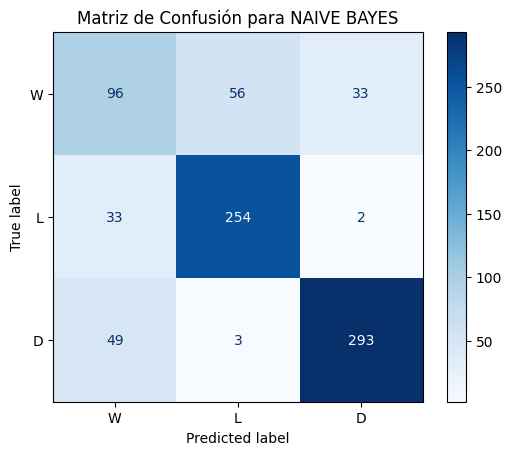

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53       185
           1       0.81      0.88      0.84       289
           2       0.89      0.85      0.87       345

    accuracy                           0.79       819
   macro avg       0.75      0.75      0.75       819
weighted avg       0.78      0.79      0.78       819

Cross-validated Accuracy: 0.791295365867493


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score


# Supongamos que tienes un DataFrame llamado df con tus datos
# y que ya has excluido las columnas que no deseas incluir.

# Selección de características data = dsXls.drop(['Date', 'Round', 'Day', 'Venue', 'Result', 'Semester','Team', 'Opponent'], axis=1)
#1 obtener datos numéricos
dataPCA = dsXls.drop(['Date', 'Round', 'Day', 'Venue', 'Result','Team', 'Opponent'], axis=1)

#2 Aplicando PCA
pca = PCA()
X_pca = pca.fit_transform(dataPCA)

#3 obtener variable objetivo Result
y = dsXls['Result']
label_encoder = LabelEncoder()
y_encodedPCA = label_encoder.fit_transform(y)

####X = dsXls.drop(['Date', 'Round', 'Day', 'Venue', 'Result', 'Semester','Team', 'Opponent'], axis=1)  # Excluye la columna 'Result' para las características
#####y = dsXls['Result']  # La columna 'Result' es la variable objetivo

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encodedPCA, test_size=0.2, random_state=42)

# Crear el modelo Gaussian Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo Naive Bayes es: {accuracy:.2f}")


###################################

# Generar y mostrar la matriz de confusión
###y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['W','L','D'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para NAIVE BAYES")
plt.show()

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Validación cruzada
cross_val_accuracy = cross_val_score(model, X_pca, y_encodedPCA, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_accuracy.mean())